In [39]:
######################################
# Importando as libraries
######################################
 
import pandas as pd
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression


In [31]:

from sklearn.datasets import load_wine, load_digits

dataset = load_wine()

# Retorna os dados e o alvo
data, target =load_digits(return_X_y=True)



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [32]:
######################################
# Importa o dataset, e transforma ele para pandas
######################################
from sklearn.datasets import load_iris
import pandas as pd

df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [33]:
######################################
# Importa o dataset
######################################
 
dataset = pd.read_csv("doencas_cardiacas.csv")
dataset = dataset.dropna()


# Pega todas as colunas menos a ultima
X = dataset.iloc[:, :-1].values
# Pega somente a ultima coluna
y = dataset.iloc[:, -1].values


In [34]:

######################################
# Separar dados em Treino e Teste
######################################
 
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)
 

In [35]:
######################################
# Treinando o modelo
######################################
 
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:

######################################
# Valor Especifico
######################################
 
print(classifier.predict([[1,30,4,0,0,0,0,0,0,195,130,70,80,20,56]]))

[0]


In [42]:
######################################
# Previsao
######################################
 
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)

y_pred_prob = y_pred_prob[:,1]

y_result_prob = np.concatenate((y_pred.reshape(len(y_pred),1), y_pred_prob.reshape(len(y_pred_prob),1)),1)
y_result_prob

array([[0.        , 0.13400761],
       [0.        , 0.18671981],
       [0.        , 0.05906357],
       ...,
       [0.        , 0.22589912],
       [0.        , 0.10928944],
       [0.        , 0.05129336]])

In [38]:

######################################
# Matrix de confusao
######################################

cm = confusion_matrix(y_test, y_pred)
print(cm)

y_result = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

print(accuracy_score(y_test, y_pred))

[[620   3]
 [103   6]]
0.855191256830601


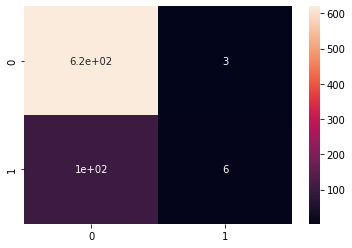

In [40]:
sns.heatmap(cm, annot=True)

In [ ]:
######################################
# Matrix de confusao
######################################
